In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-census-demographic-data/acs2017_census_tract_data.csv
/kaggle/input/us-census-demographic-data/acs2017_county_data.csv
/kaggle/input/us-census-demographic-data/acs2015_census_tract_data.csv
/kaggle/input/us-census-demographic-data/acs2015_county_data.csv
/kaggle/input/united-states-crime-rates-by-county/crime_data_w_population_and_crime_rate.csv


# Intro

# Imports

In [2]:
!pip install kaleido
import kaleido #required
kaleido.__version__ #0.2.1

import plotly
plotly.__version__ #5.5.0

import plotly.express as px

import pandas as pd

import json

# import plotly.express as px
from IPython.display import Image

from urllib.request import urlopen

# import kaleido

pd.set_option('display.max_columns', None)
pd.set_option('expand_frame_repr', False)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.3 MB/s eta 0:00:00


# Loading the data and very quick EDA

In [3]:
# first load the census data, and drop Puerto Rico as we are intrested in just the 50 states (plus Washington DC)
censusDf = pd.read_csv("/kaggle/input/us-census-demographic-data/acs2017_county_data.csv")
censusDf = censusDf.drop(censusDf[censusDf["State"] == "Puerto Rico"].index)

# also load the crime data
crimeDf = pd.read_csv("/kaggle/input/united-states-crime-rates-by-county/crime_data_w_population_and_crime_rate.csv")

print(censusDf.shape, crimeDf.shape)

(3142, 37) (3136, 24)


In [4]:
censusDf.head()

,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga County,55036,26899,28137,2.7,75.4,18.9,0.3,0.9,0.0,41016,55317,2838,27824,2024,13.7,20.1,35.3,18.0,23.2,8.1,15.4,86.0,9.6,0.1,0.6,1.3,2.5,25.8,24112,74.1,20.2,5.6,0.1,5.2
1,1003,Alabama,Baldwin County,203360,99527,103833,4.4,83.1,9.5,0.8,0.7,0.0,155376,52562,1348,29364,735,11.8,16.1,35.7,18.2,25.6,9.7,10.8,84.7,7.6,0.1,0.8,1.1,5.6,27.0,89527,80.7,12.9,6.3,0.1,5.5
2,1005,Alabama,Barbour County,26201,13976,12225,4.2,45.7,47.8,0.2,0.6,0.0,20269,33368,2551,17561,798,27.2,44.9,25.0,16.8,22.6,11.5,24.1,83.4,11.1,0.3,2.2,1.7,1.3,23.4,8878,74.1,19.1,6.5,0.3,12.4
3,1007,Alabama,Bibb County,22580,12251,10329,2.4,74.6,22.0,0.4,0.0,0.0,17662,43404,3431,20911,1889,15.2,26.6,24.4,17.6,19.7,15.9,22.4,86.4,9.5,0.7,0.3,1.7,1.5,30.0,8171,76.0,17.4,6.3,0.3,8.2
4,1009,Alabama,Blount County,57667,28490,29177,9.0,87.4,1.5,0.3,0.1,0.0,42513,47412,2630,22021,850,15.6,25.4,28.5,12.9,23.3,15.8,19.5,86.8,10.2,0.1,0.4,0.4,2.1,35.0,21380,83.9,11.9,4.0,0.1,4.9


In [5]:
crimeDf.head()

,county_name,crime_rate_per_100000,index,EDITION,PART,IDNO,CPOPARST,CPOPCRIM,AG_ARRST,AG_OFF,COVIND,INDEX,MODINDX,MURDER,RAPE,ROBBERY,AGASSLT,BURGLRY,LARCENY,MVTHEFT,ARSON,population,FIPS_ST,FIPS_CTY
0,"St. Louis city, MO",1791.995377,1,1,4,1612,318667,318667,15,15,100.0,5706,22329,119,200,1778,3609,4995,13791,3543,464,318416,29,510
1,"Crittenden County, AR",1754.914968,2,1,4,130,50717,50717,4,4,100.0,873,3424,8,38,165,662,1482,1753,189,28,49746,5,35
2,"Alexander County, IL",1664.700485,3,1,4,604,8040,8040,2,2,100.0,127,278,1,2,5,119,82,184,12,2,7629,17,3
3,"Kenedy County, TX",1456.310680,4,1,4,2681,444,444,1,1,100.0,6,13,0,3,1,2,5,4,4,0,412,48,261
4,"De Soto Parish, LA",1447.402430,5,1,4,1137,26971,26971,3,3,100.0,392,703,3,4,17,368,149,494,60,0,27083,22,31


In [6]:
censusDf["State"].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [7]:
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)
    
print(len(counties))

2


# Prepare the data

In [8]:
def convertToFips(row):
    countyId = row["CountyId"]

    if countyId >= 10000:
        return str(countyId)

    return "0" + str(countyId)

censusDf["fips"] = censusDf.apply(lambda row: convertToFips(row), axis = 1)

censusDf[["CountyId", "fips"]].head()

,CountyId,fips
0,1001,01001
1,1003,01003
2,1005,01005
3,1007,01007
4,1009,01009


# Declare the method we will use for plotting

In [9]:
def showMap(df: pd.DataFrame, counties, target: str, colorscheme="icefire", min=5, max=50):

    fig = px.choropleth(df, geojson=counties, locations='fips', color=target,
                        color_continuous_scale=colorscheme,
                        range_color=(min, max),
                        scope="usa",
                        labels={target: f'{target} distribution'}
                        )
    fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
    # config={'displayModeBar': False}
    
#     fig.write_image("/kaggle/working/p.png")
#     img_bytes = fig.to_image(format="png")
    return Image(fig.to_image(format="png", width=600, height=350, scale=2))

# Population distribution

In [10]:
minTotalPopulation = censusDf["TotalPop"].min()
maxTotalPopulation = censusDf["TotalPop"].max()

print(f"min total population {minTotalPopulation} and max total population {maxTotalPopulation}")

min total population 74 and max total population 10105722


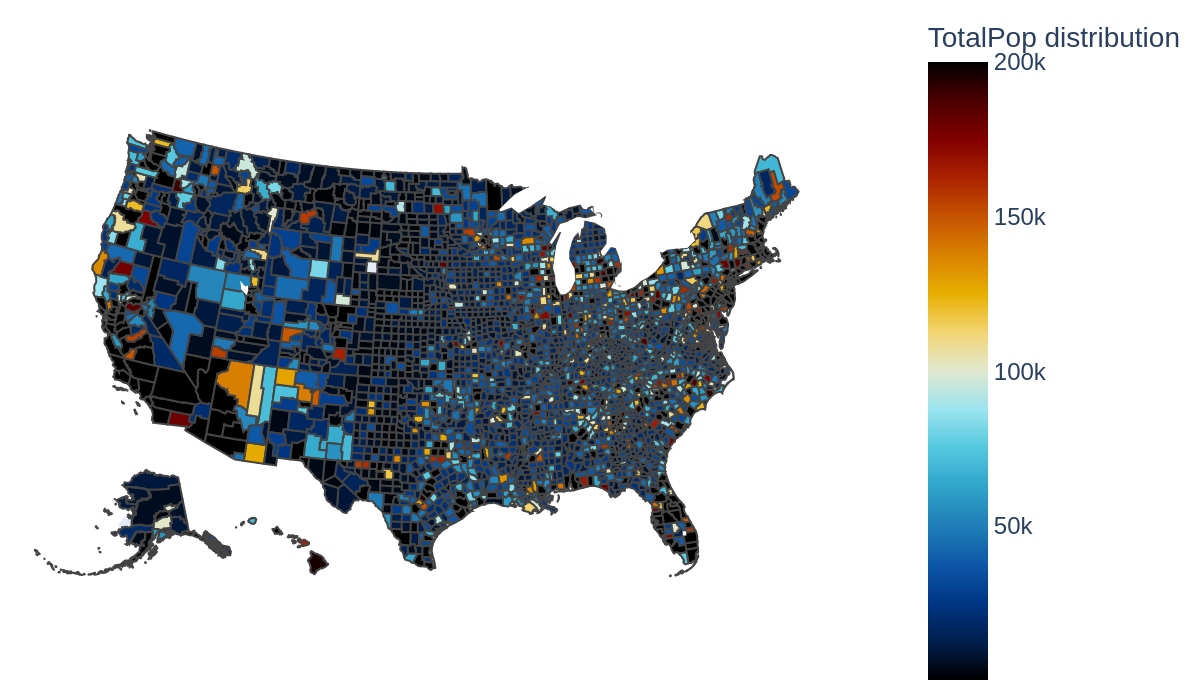

In [11]:
showMap(censusDf, counties, "TotalPop", min=200, max=200000)

# from PIL import Image
# img = Image.open("/kaggle/working/p.png")
# img.show()

# from skimage import io
 
# img = io.imread("/kaggle/working/p.png")
# io.imshow(img)

# Unemployment

# Poverty distribution

In [12]:
minPoverty = censusDf["Poverty"].min()
maxPoverty = censusDf["Poverty"].max()

print(f"min poverty {minPoverty} and max poverty {maxPoverty}")

min poverty 2.4 and max poverty 52.0


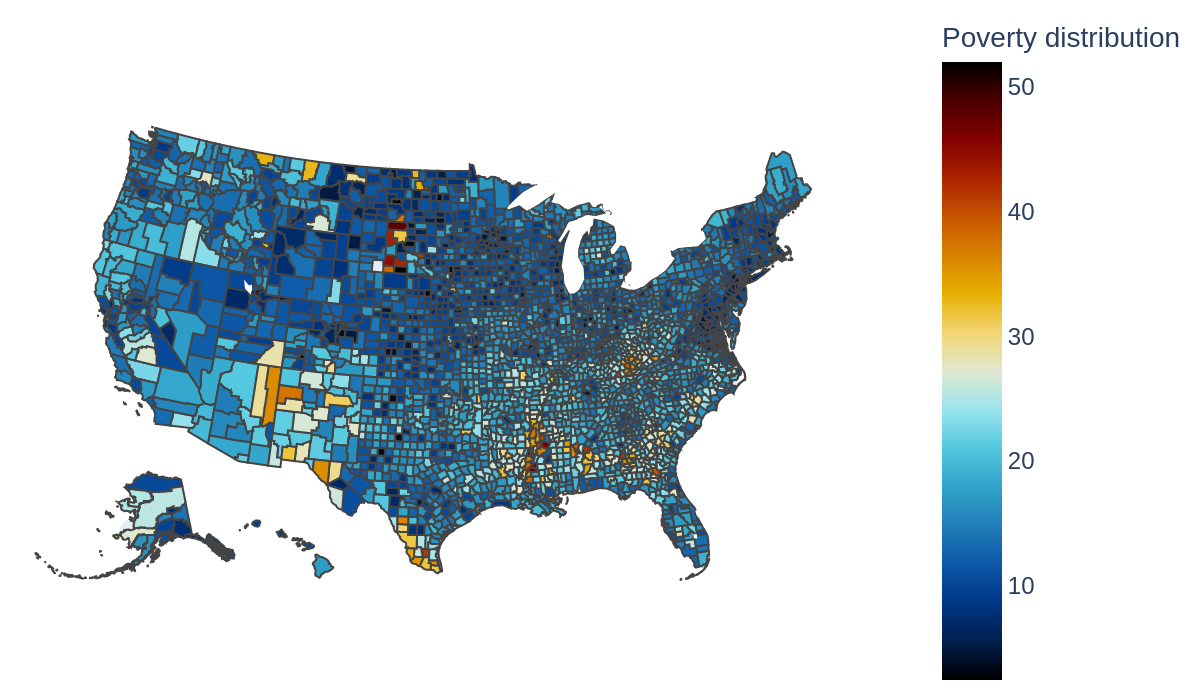

In [13]:
showMap(censusDf, counties, "Poverty", min=minPoverty, max=maxPoverty)

# Etnicity distribution

# Income distribution

# Small crimes distribution

# Hard crimes distribution

# Finish
You have made it to the finish! If you liked this please upvote :)